# Part 1
## DoWhy example

This exercise is based on [Confounding Example: Finding causal effects from observed data](https://www.pywhy.org/dowhy/v0.11.1/example_notebooks/dowhy_confounder_example.html#Confounding-Example:-Finding-causal-effects-from-observed-data)

Based on the concepts introduced in the previous lecture on estimating causal effects. The first part of the exercise is to use the DoWhy library to estimate causal effects on a dataset. 

In order to evaluate the precision of the estimation we need to simulate the dataset, so we know the true effect. To do this you can either:

1) simulate the dataset yourself based on the SCM principles;
2) use the funtion ```dowhy.datasets.linear_dataset``` to simulate the dataset for you.


When you have the dataset causal effect using DoWhy.

### STEP 1: Model the problem as a causal graph

Once you have a dataset, you need to build the graph that generated the dataset. If you use the DoWhy function it will also generate the graph for you. Once you have the graph remember to plot it! Always make a visualisation if possible. 

### STEP 2: Identify causal effect using properties of the formal causal graph

Once the estimand is identified check it for backdoors, iv (instrumental variables) and frontdoors. If you are happy continue. Pause and consider what would you do if you were not happy with a given estimand? 

### STEP 3: Estimate the causal effect

Estimate the effect and evaluate it. 

### OPTIONAL Step 4: Refuting the estimate

There are several techniques to refute the estimate, in the example link above a few is given. You can try them out and consider what is the reasons for doing them. 






(*refute* = prove (a statement or theory) to be wrong or false; disprove.)

## 3,2,1 GOOOO <33333

In [1]:
import dowhy

Matplotlib is building the font cache; this may take a moment.
/work/LauraWulffPaaby#7567/DatSci_24_forked/DataSci-AU-24/venv_dat_sci24/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
from dowhy import datasets, causal_graph, CausalModel

In [41]:
### simulating do why dat:
N = 1000
data = dowhy.datasets.linear_dataset(beta=10, # number of notes
                                    num_common_causes=1,
                                    num_instruments=6,
                                    num_samples=N,
                                    treatment_is_binary=True)



In [38]:
dataframe = data['df']
data.keys()

dict_keys(['df', 'treatment_name', 'outcome_name', 'common_causes_names', 'instrument_names', 'effect_modifier_names', 'frontdoor_variables_names', 'dot_graph', 'gml_graph', 'ate'])

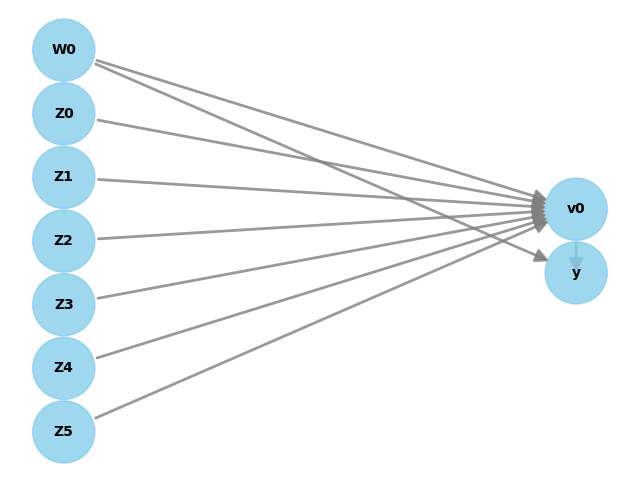

In [39]:
model= CausalModel(
        data=dataframe,
        treatment=data["treatment_name"], # these are all keys in the dictionaries 
        outcome=data["outcome_name"], 
        common_causes=data["common_causes_names"],
        instruments=data["instrument_names"])

### the above only makes sense when we simulate data using dowhy 
### if not we have to specify the relations of the data (DAG) ourself prior to modeling 


model.view_model()

##### step 2
Estimand: the effect causing the output - a way of identifying the variables that causaly effects to the outcome and to what extend 

==> is there a causal effect to be found, this is the way to figure out 



In [42]:
### Formal Causal Graph 
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d           
─────(E[y|W0])
d[v₀]         
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W0,U) = P(y|v0,W0)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                                                              -1⎤
 ⎢            d                ⎛            d                  ⎞  ⎥
E⎢─────────────────────────(y)⋅⎜─────────────────────────([v₀])⎟  ⎥
 ⎣d[Z₀  Z₁  Z₄  Z₂  Z₅  Z₃]    ⎝d[Z₀  Z₁  Z₄  Z₂  Z₅  Z₃]      ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z0,Z1,Z4,Z2,Z5,Z3})
Estimand assumption 2, Exclusion: If we remove {Z0,Z1,Z4,Z2,Z5,Z3}→{v0}, then ¬({Z0,Z1,Z4,Z2,Z5,Z3}→y)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



Laura check up on reading this - what we should be aware of is the assumptioins, so fx for the backdoor: 
`If U→{v0} and U→y then P(y|v0,W0,U) = P(y|v0,W0)`
if the first two holds, then P(y|v0,W0)

(obs {} is just meaning more than one variable)

#### STEP3: Estimate causal effect
this should resemble the beta parameter that in a linear regression explains the relation between the variables - this can be seen as the true value in the simulation, and we want to come close to this  

In [52]:
from dowhy import plotter

estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression") # can be either iv, front door or back like here 
print("Causal Estimate is " + str(estimate.value))


#estimate2 = model.estimate_effect(identified_estimand,
        #method_name="backdoor.propensity_score_matching") # different type, doesnt run w the data


Causal Estimate is -62172165733.36328


In [55]:
# Plot Slope of line between treamtent and outcome =causal effect
#dowhy.plotter.plot_causal_effect(estimate, dataframe["treatment_name"], dataframe["outcome_name"])

### step 4
(sensitivity analysis)
here we get different outputs depending on the error and suggest a way to improve the robustness 

In [56]:
# We can also refute the estimate to check its robustness to assumptions (aka sensitivity analysis, but on steroids).
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

Refute: Add a random common cause
Estimated effect:-62172165733.36328
New effect:-62602645890.32164
p value:0.8



# Part 2
## Consider how to apply causal inference to your own project.

For your own spend some time considering could causal inference be useful, consider both 
why and why not. 

What sort of questions could causal inference solve in your project?

For causal inference to be useful several things need to be considered: 

- What is the data generating process (DGP)?
- How to graph the DGP?
    - How would you find the information needed to graph it?
    - What is the relation between the different nodes in the graph?
- What is the treatment variable?
- Consider the estimand.
    - Anything that needs to be changed?
- How would you interpret and use any finding? 


